In [56]:
strategy_name = '鹏晖量化1号'

In [21]:
%load_ext line_profiler
import sys
sys.path.append("C:\Program Files\Tinysoft\Analyse.NET")
sys.path.append(r"C:\Users\xudong\Documents\github\web\dataServer")
import pymongo
import numpy as np
import matplotlib.pyplot as plt
import pickle
import time
import datetime
import copy
from funcs import *
import pandas as pd
from operator import itemgetter
import TSLPy3 as tsl
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull, convex_hull_plot_2d
import talib
import matplotlib.dates as mdates

np.set_printoptions(formatter={'float_kind': "{:.6f}".format})
client = pymongo.MongoClient('localhost', 27017)
db = client.quanLiang
dbt = client.tinySoftData

with open(r"d:\pkl\dailyBarMtx.pkl", 'rb+') as f:
    z = pickle.load(f)
dtes = z['dtes']
dtes = np.array(dtes).astype(np.int)
tkrs = list(z['tkrs'])
open_mtx = z['open_mtx']
high_mtx = z['high_mtx']
low_mtx = z['low_mtx']
close_mtx = z['close_mtx']

k = close_mtx==0
close_mtx = zero2pre(close_mtx)
open_mtx[k]=close_mtx[k]
high_mtx[k]=close_mtx[k]
low_mtx[k]=close_mtx[k]

name = z['name']
belong = z['belong']
shenwan1 = z['shenwan1']
shenwan2 = z['shenwan2']
shenwan3 = z['shenwan3']
vol_mtx = z['vol_mtx']
amount_mtx = z['amount_mtx']


The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


In [42]:
maxD = 3

In [43]:
dd = list(dbt.minuteBarStock.find({'ticker':'SH601988', 'dateAsInt':{'$gte':int(dtes[-maxD]), '$lte':int(dtes[-1])}}, {'dateTime':1}))
timeAsFloat = []
for x in dd:
    l  = str(x['dateTime']+datetime.timedelta(hours=8))
    dl = float(l[0:4]+l[5:7]+l[8:10]+'.'+l[11:13]+l[14:16]+l[17:19])
    timeAsFloat.append(dl)
timeAsFloat=np.round(np.array(sorted(list(set([x - int(x) for x in timeAsFloat])))), 6)
timeLabels = []
dayOff = []
for i in range(maxD):
    for x in timeAsFloat:
        s = str(int(x*1e4))
        if len(s)<4:
            s='0'+s
        timeLabels.append('第'+str(i+1)+'天'+s[:2]+':'+s[2:4])
        dayOff.append(i)
timeAsFloat = list(timeAsFloat)*maxD
t = np.round(np.array(sorted(list(set([x - int(x) for x in timeAsFloat])))), 6)
maxM = t.shape[0] * maxD

In [44]:
trades = list(db.backTestTrades.find())
Po = []
Ph = []
Pl = []
Pc = []
for (i,x) in enumerate(trades):
    #if (x['name'] in list(name)):
    p = list(name).index(x['name'])
    ticker = tkrs[p]
    d0 = x['dateIn']
    q = list(dtes).index(d0)
    j = np.min((q+maxD, dtes.shape[0]-1))
    d1 = dtes[j]
    dd = list(dbt.minuteBarStock.find({'ticker':ticker, 'dateAsInt':{'$gte':int(d0), '$lt':int(d1)}}, {'open':1, 'high':1, 'low':1,'close':1, 'dateTime':1}).sort([('dateTime',1)]))
    if dd==[]:
        continue
    q = np.array([x['open'] for x in dd])
    print(i, '/', len(trades),len(q),dd[0]['dateTime'],dd[-1]['dateTime'])
    z = np.min((len(q),maxM))
    m = np.zeros(maxM)
    m[:z] = q[:z]
    m[z:] = m[z-1]
    Po.append(m)
    #q = np.array([x['high'] for x in dd])
    #z = np.min((len(q),maxM))
    #m = np.zeros(maxM)
    #m[:z]=q[:z]
    #m[z:]=m[z-1]
    #Ph.append(m)
    #q = np.array([x['low'] for x in dd])
    #z = np.min((len(q),maxM))
    #m = np.zeros(maxM)
    #m[:z]=q[:z]
    #m[z:]=m[z-1]
    #Pl.append(m)
    #q = np.array([x['close'] for x in dd])
    #z = np.min((len(q),maxM))
    #m = np.zeros(maxM)
    #m[:z]=q[:z]
    #m[z:]=m[z-1]
    #Pc.append(m)


0 / 514 720 2019-02-19 01:31:00 2019-02-21 07:00:00
1 / 514 720 2019-02-19 01:31:00 2019-02-21 07:00:00
2 / 514 720 2019-02-25 01:31:00 2019-02-27 07:00:00
3 / 514 720 2019-02-25 01:31:00 2019-02-27 07:00:00
4 / 514 720 2019-02-25 01:31:00 2019-02-27 07:00:00
5 / 514 720 2019-02-25 01:31:00 2019-02-27 07:00:00
6 / 514 720 2019-02-26 01:31:00 2019-02-28 07:00:00
7 / 514 720 2019-02-26 01:31:00 2019-02-28 07:00:00
8 / 514 720 2019-02-26 01:31:00 2019-02-28 07:00:00
9 / 514 720 2019-02-26 01:31:00 2019-02-28 07:00:00
10 / 514 720 2019-02-26 01:31:00 2019-02-28 07:00:00
11 / 514 720 2019-02-26 01:31:00 2019-02-28 07:00:00
12 / 514 720 2019-02-26 01:31:00 2019-02-28 07:00:00
13 / 514 720 2019-02-26 01:31:00 2019-02-28 07:00:00
14 / 514 720 2019-02-26 01:31:00 2019-02-28 07:00:00
15 / 514 720 2019-02-27 01:31:00 2019-03-01 07:00:00
16 / 514 720 2019-03-01 01:31:00 2019-03-05 07:00:00
17 / 514 720 2019-03-04 01:31:00 2019-03-06 07:00:00
18 / 514 720 2019-03-04 01:31:00 2019-03-06 07:00:00
19 

157 / 514 960 2019-08-23 01:31:00 2019-08-27 07:00:00
158 / 514 1200 2019-08-26 01:31:00 2019-08-28 07:00:00
159 / 514 720 2019-08-27 01:31:00 2019-08-29 07:00:00
160 / 514 720 2019-08-27 01:31:00 2019-08-29 07:00:00
161 / 514 720 2019-08-27 01:31:00 2019-08-29 07:00:00
162 / 514 720 2019-09-04 01:31:00 2019-09-06 07:00:00
163 / 514 720 2019-09-05 01:31:00 2019-09-09 07:00:00
164 / 514 720 2019-09-05 01:31:00 2019-09-09 07:00:00
165 / 514 720 2019-09-06 01:31:00 2019-09-10 07:00:00
166 / 514 720 2019-09-09 01:31:00 2019-09-11 07:00:00
167 / 514 720 2019-09-09 01:31:00 2019-09-11 07:00:00
168 / 514 720 2019-09-09 01:31:00 2019-09-11 07:00:00
169 / 514 720 2019-09-09 01:31:00 2019-09-11 07:00:00
170 / 514 720 2019-09-09 01:31:00 2019-09-11 07:00:00
171 / 514 720 2019-09-09 01:31:00 2019-09-11 07:00:00
172 / 514 720 2019-09-09 01:31:00 2019-09-11 07:00:00
173 / 514 720 2019-09-09 01:31:00 2019-09-11 07:00:00
174 / 514 720 2019-09-09 01:31:00 2019-09-11 07:00:00
175 / 514 720 2019-09-10 01

313 / 514 720 2020-03-05 01:31:00 2020-03-09 07:00:00
314 / 514 720 2020-03-05 01:31:00 2020-03-09 07:00:00
315 / 514 720 2020-03-06 01:31:00 2020-03-10 07:00:00
316 / 514 720 2020-03-09 01:31:00 2020-03-11 07:00:00
317 / 514 720 2020-03-18 01:31:00 2020-03-20 07:00:00
318 / 514 720 2020-03-25 01:31:00 2020-03-27 07:00:00
319 / 514 720 2020-03-25 01:31:00 2020-03-27 07:00:00
320 / 514 720 2020-03-27 01:31:00 2020-03-31 07:00:00
321 / 514 720 2020-03-31 01:31:00 2020-04-02 07:00:00
322 / 514 720 2020-04-09 01:31:00 2020-04-13 07:00:00
323 / 514 720 2020-04-09 01:31:00 2020-04-13 07:00:00
324 / 514 720 2020-04-09 01:31:00 2020-04-13 07:00:00
325 / 514 720 2020-04-10 01:31:00 2020-04-14 07:00:00
326 / 514 720 2020-04-13 01:31:00 2020-04-15 07:00:00
327 / 514 720 2020-04-15 01:31:00 2020-04-17 07:00:00
328 / 514 720 2020-04-17 01:31:00 2020-04-21 07:00:00
329 / 514 720 2020-04-17 01:31:00 2020-04-21 07:00:00
330 / 514 720 2020-04-21 01:31:00 2020-04-23 07:00:00
331 / 514 720 2020-04-23 01:

469 / 514 720 2020-07-30 01:31:00 2020-08-03 07:00:00
470 / 514 720 2020-07-30 01:31:00 2020-08-03 07:00:00
471 / 514 720 2020-07-30 01:31:00 2020-08-03 07:00:00
472 / 514 720 2020-07-30 01:31:00 2020-08-03 07:00:00
473 / 514 720 2020-07-31 01:31:00 2020-08-04 07:00:00
474 / 514 720 2020-07-31 01:31:00 2020-08-04 07:00:00
475 / 514 720 2020-08-03 01:31:00 2020-08-05 07:00:00
476 / 514 720 2020-08-03 01:31:00 2020-08-05 07:00:00
477 / 514 720 2020-08-03 01:31:00 2020-08-05 07:00:00
478 / 514 720 2020-08-03 01:31:00 2020-08-05 07:00:00
479 / 514 720 2020-08-03 01:31:00 2020-08-05 07:00:00
480 / 514 720 2020-08-04 01:31:00 2020-08-06 07:00:00
481 / 514 720 2020-08-04 01:31:00 2020-08-06 07:00:00
482 / 514 720 2020-08-06 01:31:00 2020-08-10 07:00:00
483 / 514 720 2020-08-06 01:31:00 2020-08-10 07:00:00
484 / 514 720 2020-08-06 01:31:00 2020-08-10 07:00:00
485 / 514 720 2020-08-07 01:31:00 2020-08-11 07:00:00
486 / 514 720 2020-08-10 01:31:00 2020-08-12 07:00:00
487 / 514 720 2020-08-10 01:

In [45]:
Po = np.array(Po)
#Ph = np.array(Ph)
#Pl = np.array(Pl)
#Pc = np.array(Pc)

In [46]:
#x = [str(x) for x in dateLabel]
#dateLabel
#dLabel = np.array([datetime.datetime.strptime(str(int(float(d)*1e4)), '%H%M').date() for d in x])

In [93]:
r=Po[:,1:]/Po[:,:-1] - 1
r=np.hstack((np.zeros((r.shape[0],1)),r))
priceChange = np.mean(r,axis=0)
priceChangeStd = np.std(r, axis=0)
priceChangeStd[np.isfinite(priceChangeStd)==False]=0

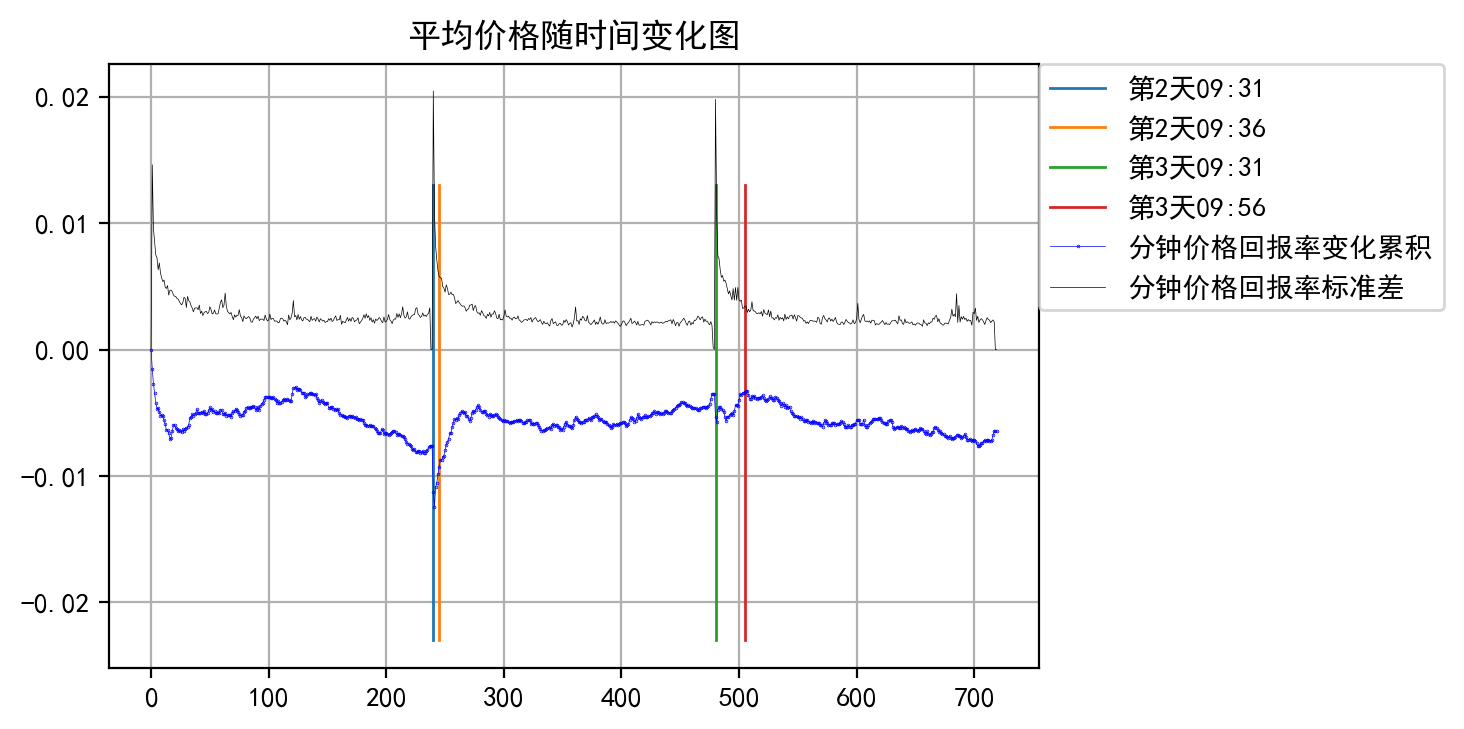

In [97]:
plt.rcParams['font.sans-serif'] = [u'SimHei']
plt.rcParams['axes.unicode_minus'] = False
default_dpi = plt.rcParamsDefault['figure.dpi']
plt.rcParams['figure.dpi'] = default_dpi*2
plt.figure()
plt.title('平均价格随时间变化图')
#tp = [240,245,480,505,710,990,1700]
tp = [240,245,480,505]
legends=[]
if np.max(tp)<600:
    linewidth=1
else:
    linewidth=0.25
for k in tp:
    plt.plot([k, k],[-0.023,0.013], linewidth=linewidth)
    legends.append(timeLabels[k])
plt.plot(np.cumsum(priceChange),'b-', marker="o", linewidth=0.25,markersize=0.25)
plt.plot(priceChangeStd, 'k',  linewidth=0.25, markersize=0.25)
legends.append('分钟价格回报率变化累积')
legends.append('分钟价格回报率标准差')
plt.legend(legends,bbox_to_anchor=(1.0, 1.0), loc=2, borderaxespad=0.)
plt.grid()
db.strategyMinuteBar.update_one({strategy_name:strategy_name}, {'$set':{
    'labels':timeLabels,
    'priceChange': list(priceChange),
    'priceChangeStd': list(priceChangeStd),
    'concernPoints': tp,
    'priceType': '开盘价'
}},upsert=True)

In [53]:
inTime = 240
otTime = 505


In [54]:
def getPnl():
    dd = list(dtes)
    nn = list(name)
    pnl = []
    l = [x['dateIn'] for x in trades]
    c = {}
    for q in l:
        c[q]=l.count(q)
    for (i,t) in enumerate(trades):
        n = t['name']
        j = dd.index(t['dateIn'])
        print(t)
        jin = j + dayOff[inTime]
        jot = j + dayOff[otTime]
        if (jin>=len(dtes)):
            jin = len(dtes)-1
        if (jot>=len(dtes)):
            jot = len(dtes)-1
        din = dtes[jin]+timeAsFloat[inTime]
        dot = dtes[jot]+timeAsFloat[otTime]
        dtIn=datetime.datetime.strptime(str(din), '%Y%m%d.%H%M')+datetime.timedelta(hours=-8)
        dtOt=datetime.datetime.strptime(str(dot), '%Y%m%d.%H%M')+datetime.timedelta(hours=-8)
        q1 = dbt.minuteBarStock.find_one({'ticker':tkrs[nn.index(n)], 'dateTime':dtIn},{'ticker':1, 'name':1, 'open':1})
        q2 = dbt.minuteBarStock.find_one({'ticker':tkrs[nn.index(n)], 'dateTime':dtOt},{'ticker':1, 'name':1, 'open':1})
        if q1==None:
            continue
        if q2==None:
            continue
        r = (q2['open']/q1['open']-1)/c[t['dateIn']]
        print(t['dateIn'], n, dtIn, dtOt,r)
        pnl.append(r)
    return pnl

In [39]:
# #%lprun -f getPnl getPnl()

{'_id': ObjectId('5f685b28d181168d5bd7ec03'), 'name': '深高速  ', 'dateIn': 20190219}
20190219 深高速   2019-02-20 01:31:00 2019-02-28 01:51:00 -0.008994708994709
{'_id': ObjectId('5f685b28d181168d5bd7ec04'), 'name': '高德红外', 'dateIn': 20190219}
20190219 高德红外 2019-02-20 01:31:00 2019-02-28 01:51:00 0.056739130434782625
{'_id': ObjectId('5f685b28d181168d5bd7ec05'), 'name': '世纪华通', 'dateIn': 20190221}
20190221 世纪华通 2019-02-22 01:31:00 2019-03-04 01:51:00 -0.10486725663716823
{'_id': ObjectId('5f685b28d181168d5bd7ec06'), 'name': '生益科技', 'dateIn': 20190225}
20190225 生益科技 2019-02-26 01:31:00 2019-03-06 01:51:00 -0.0082263242375602
{'_id': ObjectId('5f685b28d181168d5bd7ec07'), 'name': '上实发展', 'dateIn': 20190225}
20190225 上实发展 2019-02-26 01:31:00 2019-03-06 01:51:00 0.05174927113702621
{'_id': ObjectId('5f685b28d181168d5bd7ec08'), 'name': '深圳机场', 'dateIn': 20190225}
20190225 深圳机场 2019-02-26 01:31:00 2019-03-06 01:51:00 -0.009970089730807541
{'_id': ObjectId('5f685b28d181168d5bd7ec09'), 'name': '视源股份

20190319 东方电气 2019-03-20 01:31:00 2019-03-28 01:51:00 -0.01712538226299694
{'_id': ObjectId('5f685b28d181168d5bd7ec38'), 'name': '中国平安', 'dateIn': 20190319}
20190319 中国平安 2019-03-20 01:31:00 2019-03-28 01:51:00 -0.008748556710187408
{'_id': ObjectId('5f685b28d181168d5bd7ec39'), 'name': '牧原股份', 'dateIn': 20190319}
20190319 牧原股份 2019-03-20 01:31:00 2019-03-28 01:51:00 -0.003966201069149873
{'_id': ObjectId('5f685b28d181168d5bd7ec3a'), 'name': '二三四五', 'dateIn': 20190320}
20190320 二三四五 2019-03-21 01:31:00 2019-03-29 01:51:00 -0.06229508196721312
{'_id': ObjectId('5f685b28d181168d5bd7ec3b'), 'name': '雅戈尔  ', 'dateIn': 20190321}
20190321 雅戈尔   2019-03-22 01:31:00 2019-04-01 01:51:00 0.008888888888888872
{'_id': ObjectId('5f685b28d181168d5bd7ec3c'), 'name': '艾迪精密', 'dateIn': 20190321}
20190321 艾迪精密 2019-03-22 01:31:00 2019-04-01 01:51:00 0.00033101621979477375
{'_id': ObjectId('5f685b28d181168d5bd7ec3d'), 'name': '克来机电', 'dateIn': 20190321}
20190321 克来机电 2019-03-22 01:31:00 2019-04-01 01:51:0

20190415 徐工机械 2019-04-16 01:31:00 2019-04-24 01:51:00 -0.0012170385395537276
{'_id': ObjectId('5f685b28d181168d5bd7ec6e'), 'name': '立讯精密', 'dateIn': 20190417}
20190417 立讯精密 2019-04-18 01:31:00 2019-04-26 01:51:00 -0.008995502248875464
{'_id': ObjectId('5f685b28d181168d5bd7ec6f'), 'name': '海亮股份', 'dateIn': 20190418}
20190418 海亮股份 2019-04-19 01:31:00 2019-04-29 01:51:00 0.023662551440329027
{'_id': ObjectId('5f685b28d181168d5bd7ec70'), 'name': '东方电缆', 'dateIn': 20190419}
20190419 东方电缆 2019-04-22 01:31:00 2019-04-30 01:51:00 -0.08016032064128259
{'_id': ObjectId('5f685b28d181168d5bd7ec71'), 'name': '中顺洁柔', 'dateIn': 20190419}
20190419 中顺洁柔 2019-04-22 01:31:00 2019-04-30 01:51:00 -0.002767527675276771
{'_id': ObjectId('5f685b28d181168d5bd7ec72'), 'name': '福田汽车', 'dateIn': 20190422}
20190422 福田汽车 2019-04-23 01:31:00 2019-05-06 01:51:00 -0.07001044932079414
{'_id': ObjectId('5f685b28d181168d5bd7ec73'), 'name': '东兴证券', 'dateIn': 20190422}
20190422 东兴证券 2019-04-23 01:31:00 2019-05-06 01:51:00 

20190814 歌尔股份 2019-08-15 01:31:00 2019-08-23 01:51:00 0.03193960511033681
{'_id': ObjectId('5f685b28d181168d5bd7eca4'), 'name': '立讯精密', 'dateIn': 20190814}
20190814 立讯精密 2019-08-15 01:31:00 2019-08-23 01:51:00 0.01866969009826151
{'_id': ObjectId('5f685b28d181168d5bd7eca5'), 'name': '深南电路', 'dateIn': 20190814}
20190814 深南电路 2019-08-15 01:31:00 2019-08-23 01:51:00 0.022956084013192157
{'_id': ObjectId('5f685b28d181168d5bd7eca6'), 'name': '深圳机场', 'dateIn': 20190820}
20190820 深圳机场 2019-08-21 01:31:00 2019-08-29 01:51:00 -0.01262398557258787
{'_id': ObjectId('5f685b28d181168d5bd7eca7'), 'name': '光环新网', 'dateIn': 20190820}
20190820 光环新网 2019-08-21 01:31:00 2019-08-29 01:51:00 -0.028860759493670896
{'_id': ObjectId('5f685b28d181168d5bd7eca8'), 'name': '恒瑞医药', 'dateIn': 20190822}
20190822 恒瑞医药 2019-08-23 01:31:00 2019-09-02 01:51:00 0.09324137931034482
{'_id': ObjectId('5f685b28d181168d5bd7eca9'), 'name': '华能水电', 'dateIn': 20190823}
20190823 华能水电 2019-08-26 01:31:00 2019-09-03 01:51:00 0.0
{'

20191030 爱尔眼科 2019-10-31 01:31:00 2019-11-08 01:51:00 0.051780752715332
{'_id': ObjectId('5f685b28d181168d5bd7ecda'), 'name': '中海油服', 'dateIn': 20191031}
20191031 中海油服 2019-11-01 01:31:00 2019-11-11 01:51:00 0.03131381892443841
{'_id': ObjectId('5f685b28d181168d5bd7ecdb'), 'name': '海螺水泥', 'dateIn': 20191104}
20191104 海螺水泥 2019-11-05 01:31:00 2019-11-13 01:51:00 -0.021783067594879857
{'_id': ObjectId('5f685b28d181168d5bd7ecdc'), 'name': '东诚药业', 'dateIn': 20191104}
20191104 东诚药业 2019-11-05 01:31:00 2019-11-13 01:51:00 0.026936026936026924
{'_id': ObjectId('5f685b28d181168d5bd7ecdd'), 'name': '美的集团', 'dateIn': 20191108}
20191108 美的集团 2019-11-11 01:31:00 2019-11-19 01:51:00 -0.028473998294970215
{'_id': ObjectId('5f685b28d181168d5bd7ecde'), 'name': '中国天楹', 'dateIn': 20191120}
20191120 中国天楹 2019-11-21 01:31:00 2019-11-29 01:51:00 -0.059171597633136064
{'_id': ObjectId('5f685b28d181168d5bd7ecdf'), 'name': '闻泰科技', 'dateIn': 20191122}
20191122 闻泰科技 2019-11-25 01:31:00 2019-12-03 01:51:00 0.056

20200120 安图生物 2020-01-21 01:31:00 2020-02-06 01:51:00 0.011370052872029175
{'_id': ObjectId('5f685b29d181168d5bd7ed0f'), 'name': '健友股份', 'dateIn': 20200120}
20200120 健友股份 2020-01-21 01:31:00 2020-02-06 01:51:00 -0.0017714285714285666
{'_id': ObjectId('5f685b29d181168d5bd7ed10'), 'name': '艾华集团', 'dateIn': 20200120}
20200120 艾华集团 2020-01-21 01:31:00 2020-02-06 01:51:00 -0.013868613138686132
{'_id': ObjectId('5f685b29d181168d5bd7ed11'), 'name': '顺鑫农业', 'dateIn': 20200120}
20200120 顺鑫农业 2020-01-21 01:31:00 2020-02-06 01:51:00 -0.017281532842851832
{'_id': ObjectId('5f685b29d181168d5bd7ed12'), 'name': '智飞生物', 'dateIn': 20200120}
20200120 智飞生物 2020-01-21 01:31:00 2020-02-06 01:51:00 0.008308139119670528
{'_id': ObjectId('5f685b29d181168d5bd7ed13'), 'name': '英科医疗', 'dateIn': 20200120}
20200120 英科医疗 2020-01-21 01:31:00 2020-02-06 01:51:00 0.011123897199846569
{'_id': ObjectId('5f685b29d181168d5bd7ed14'), 'name': '再升科技', 'dateIn': 20200121}
20200121 再升科技 2020-01-22 01:31:00 2020-02-07 01:51:00 

20200303 创业慧康 2020-03-04 01:31:00 2020-03-12 01:51:00 -0.01354815086049066
{'_id': ObjectId('5f685b29d181168d5bd7ed44'), 'name': '欧普康视', 'dateIn': 20200303}
20200303 欧普康视 2020-03-04 01:31:00 2020-03-12 01:51:00 -0.0034988861223954957
{'_id': ObjectId('5f685b29d181168d5bd7ed45'), 'name': '三全食品', 'dateIn': 20200304}
20200304 三全食品 2020-03-05 01:31:00 2020-03-13 01:51:00 -0.10668708524757531
{'_id': ObjectId('5f685b29d181168d5bd7ed46'), 'name': '红塔证券', 'dateIn': 20200305}
20200305 红塔证券 2020-03-06 01:31:00 2020-03-16 01:51:00 -0.023333333333333317
{'_id': ObjectId('5f685b29d181168d5bd7ed47'), 'name': '数据港  ', 'dateIn': 20200305}
20200305 数据港   2020-03-06 01:31:00 2020-03-16 01:51:00 -0.012794918330308519
{'_id': ObjectId('5f685b29d181168d5bd7ed48'), 'name': '利欧股份', 'dateIn': 20200305}
20200305 利欧股份 2020-03-06 01:31:00 2020-03-16 01:51:00 -0.006315789473684219
{'_id': ObjectId('5f685b29d181168d5bd7ed49'), 'name': '光环新网', 'dateIn': 20200305}
20200305 光环新网 2020-03-06 01:31:00 2020-03-16 01:51:

20200601 芒果超媒 2020-06-02 01:31:00 2020-06-10 01:51:00 -0.021223525293190965
{'_id': ObjectId('5f685b29d181168d5bd7ed79'), 'name': '美的集团', 'dateIn': 20200602}
20200602 美的集团 2020-06-03 01:31:00 2020-06-11 01:51:00 0.004902789518174133
{'_id': ObjectId('5f685b29d181168d5bd7ed7a'), 'name': '鄂武商Ａ', 'dateIn': 20200602}
20200602 鄂武商Ａ 2020-06-03 01:31:00 2020-06-11 01:51:00 -0.005469301340860988
{'_id': ObjectId('5f685b29d181168d5bd7ed7b'), 'name': '罗 牛 山', 'dateIn': 20200602}
20200602 罗 牛 山 2020-06-03 01:31:00 2020-06-11 01:51:00 -0.01731601731601734
{'_id': ObjectId('5f685b29d181168d5bd7ed7c'), 'name': '南大光电', 'dateIn': 20200602}
20200602 南大光电 2020-06-03 01:31:00 2020-06-11 01:51:00 0.006658291457286469
{'_id': ObjectId('5f685b29d181168d5bd7ed7d'), 'name': '利尔化学', 'dateIn': 20200603}
20200603 利尔化学 2020-06-04 01:31:00 2020-06-12 01:51:00 0.03637447823494333
{'_id': ObjectId('5f685b29d181168d5bd7ed7e'), 'name': '安图生物', 'dateIn': 20200608}
20200608 安图生物 2020-06-09 01:31:00 2020-06-17 01:51:00 0

20200707 云铝股份 2020-07-08 01:31:00 2020-07-16 01:51:00 0.017078561382358845
{'_id': ObjectId('5f685b29d181168d5bd7edaf'), 'name': '西部证券', 'dateIn': 20200707}
20200707 西部证券 2020-07-08 01:31:00 2020-07-16 01:51:00 0.007746790615316529
{'_id': ObjectId('5f685b29d181168d5bd7edb0'), 'name': '富奥股份', 'dateIn': 20200708}
20200708 富奥股份 2020-07-09 01:31:00 2020-07-17 01:51:00 0.01859229747675961
{'_id': ObjectId('5f685b29d181168d5bd7edb1'), 'name': '麦格米特', 'dateIn': 20200708}
20200708 麦格米特 2020-07-09 01:31:00 2020-07-17 01:51:00 0.020325203252032537
{'_id': ObjectId('5f685b29d181168d5bd7edb2'), 'name': '英科医疗', 'dateIn': 20200708}
20200708 英科医疗 2020-07-09 01:31:00 2020-07-17 01:51:00 0.05747827412715356
{'_id': ObjectId('5f685b29d181168d5bd7edb3'), 'name': '中国汽研', 'dateIn': 20200709}
20200709 中国汽研 2020-07-10 01:31:00 2020-07-20 01:51:00 0.002970297029702973
{'_id': ObjectId('5f685b29d181168d5bd7edb4'), 'name': '卫宁健康', 'dateIn': 20200709}
20200709 卫宁健康 2020-07-10 01:31:00 2020-07-20 01:51:00 -0.035

20200730 山东高速 2020-07-31 01:31:00 2020-08-10 01:51:00 -0.005084325396825397
{'_id': ObjectId('5f685b29d181168d5bd7ede6'), 'name': '宝信软件', 'dateIn': 20200730}
20200730 宝信软件 2020-07-31 01:31:00 2020-08-10 01:51:00 -0.00029761904761904656
{'_id': ObjectId('5f685b29d181168d5bd7ede7'), 'name': '财通证券', 'dateIn': 20200730}
20200730 财通证券 2020-07-31 01:31:00 2020-08-10 01:51:00 -0.005816412859560065
{'_id': ObjectId('5f685b29d181168d5bd7ede8'), 'name': '江山欧派', 'dateIn': 20200730}
20200730 江山欧派 2020-07-31 01:31:00 2020-08-10 01:51:00 0.0027075812274368247
{'_id': ObjectId('5f685b29d181168d5bd7ede9'), 'name': '高能环境', 'dateIn': 20200730}
20200730 高能环境 2020-07-31 01:31:00 2020-08-10 01:51:00 0.0064225053078556344
{'_id': ObjectId('5f685b29d181168d5bd7edea'), 'name': '思源电气', 'dateIn': 20200730}
20200730 思源电气 2020-07-31 01:31:00 2020-08-10 01:51:00 0.001057529610829111
{'_id': ObjectId('5f685b29d181168d5bd7edeb'), 'name': '齐翔腾达', 'dateIn': 20200730}
20200730 齐翔腾达 2020-07-31 01:31:00 2020-08-10 01:51:

{'_id': ObjectId('5f685b29d181168d5bd7ee1b'), 'name': '日月股份', 'dateIn': 20200914}
{'_id': ObjectId('5f685b29d181168d5bd7ee1c'), 'name': '岱美股份', 'dateIn': 20200916}
{'_id': ObjectId('5f685b29d181168d5bd7ee1d'), 'name': '欣旺达', 'dateIn': 20200917}


In [55]:
pnl = getPnl()

{'_id': ObjectId('5f696788d181168d5bd7f627'), 'name': '深高速  ', 'dateIn': 20190219, 'strategy_name': '鹏晖量化1号'}
20190219 深高速   2019-02-20 01:31:00 2019-02-21 01:56:00 -0.004232804232804255
{'_id': ObjectId('5f696788d181168d5bd7f628'), 'name': '高德红外', 'dateIn': 20190219, 'strategy_name': '鹏晖量化1号'}
20190219 高德红外 2019-02-20 01:31:00 2019-02-21 01:56:00 0.01565217391304341
{'_id': ObjectId('5f696788d181168d5bd7f629'), 'name': '生益科技', 'dateIn': 20190225, 'strategy_name': '鹏晖量化1号'}
20190225 生益科技 2019-02-26 01:31:00 2019-02-27 01:56:00 -0.007223113964687028
{'_id': ObjectId('5f696788d181168d5bd7f62a'), 'name': '上实发展', 'dateIn': 20190225, 'strategy_name': '鹏晖量化1号'}
20190225 上实发展 2019-02-26 01:31:00 2019-02-27 01:56:00 -0.0014577259475218596
{'_id': ObjectId('5f696788d181168d5bd7f62b'), 'name': '深圳机场', 'dateIn': 20190225, 'strategy_name': '鹏晖量化1号'}
20190225 深圳机场 2019-02-26 01:31:00 2019-02-27 01:56:00 -0.009970089730807541
{'_id': ObjectId('5f696788d181168d5bd7f62c'), 'name': '视源股份', 'dateIn': 20

{'_id': ObjectId('5f696789d181168d5bd7f654'), 'name': '深圳能源', 'dateIn': 20190313, 'strategy_name': '鹏晖量化1号'}
20190313 深圳能源 2019-03-14 01:31:00 2019-03-15 01:56:00 0.0007961783439490722
{'_id': ObjectId('5f696789d181168d5bd7f655'), 'name': '同花顺', 'dateIn': 20190313, 'strategy_name': '鹏晖量化1号'}
20190313 同花顺 2019-03-14 01:31:00 2019-03-15 01:56:00 -0.013114561279698844
{'_id': ObjectId('5f696789d181168d5bd7f656'), 'name': '裕同科技', 'dateIn': 20190314, 'strategy_name': '鹏晖量化1号'}
20190314 裕同科技 2019-03-15 01:31:00 2019-03-18 01:56:00 -0.018188117096829992
{'_id': ObjectId('5f696789d181168d5bd7f657'), 'name': '川投能源', 'dateIn': 20190318, 'strategy_name': '鹏晖量化1号'}
20190318 川投能源 2019-03-19 01:31:00 2019-03-20 01:56:00 0.008937960042060933
{'_id': ObjectId('5f696789d181168d5bd7f658'), 'name': '五矿稀土', 'dateIn': 20190318, 'strategy_name': '鹏晖量化1号'}
20190318 五矿稀土 2019-03-19 01:31:00 2019-03-20 01:56:00 -0.007636363636363663
{'_id': ObjectId('5f696789d181168d5bd7f659'), 'name': '东方电气', 'dateIn': 201903

20190409 塔牌集团 2019-04-10 01:31:00 2019-04-11 01:56:00 -0.007148231753197898
{'_id': ObjectId('5f696789d181168d5bd7f681'), 'name': '吉比特  ', 'dateIn': 20190410, 'strategy_name': '鹏晖量化1号'}
20190410 吉比特   2019-04-11 01:31:00 2019-04-12 01:56:00 0.007205584327854009
{'_id': ObjectId('5f696789d181168d5bd7f682'), 'name': '东方电缆', 'dateIn': 20190410, 'strategy_name': '鹏晖量化1号'}
20190410 东方电缆 2019-04-11 01:31:00 2019-04-12 01:56:00 -0.016282764098490887
{'_id': ObjectId('5f696789d181168d5bd7f683'), 'name': '大唐电信', 'dateIn': 20190411, 'strategy_name': '鹏晖量化1号'}
20190411 大唐电信 2019-04-12 01:31:00 2019-04-15 01:56:00 0.02450980392156865
{'_id': ObjectId('5f696789d181168d5bd7f684'), 'name': '中国平安', 'dateIn': 20190411, 'strategy_name': '鹏晖量化1号'}
20190411 中国平安 2019-04-12 01:31:00 2019-04-15 01:56:00 0.007778469197261995
{'_id': ObjectId('5f696789d181168d5bd7f685'), 'name': '亿纬锂能', 'dateIn': 20190411, 'strategy_name': '鹏晖量化1号'}
20190411 亿纬锂能 2019-04-12 01:31:00 2019-04-15 01:56:00 -0.0024787535410764616


20190701 宁波银行 2019-07-02 01:31:00 2019-07-03 01:56:00 -0.00042977479800583785
{'_id': ObjectId('5f696789d181168d5bd7f6ae'), 'name': '伟星新材', 'dateIn': 20190701, 'strategy_name': '鹏晖量化1号'}
20190701 伟星新材 2019-07-02 01:31:00 2019-07-03 01:56:00 -0.0007296902870115149
{'_id': ObjectId('5f696789d181168d5bd7f6af'), 'name': '凯莱英', 'dateIn': 20190701, 'strategy_name': '鹏晖量化1号'}
20190701 凯莱英 2019-07-02 01:31:00 2019-07-03 01:56:00 0.0007129445315036755
{'_id': ObjectId('5f696789d181168d5bd7f6b0'), 'name': '坚朗五金', 'dateIn': 20190703, 'strategy_name': '鹏晖量化1号'}
20190703 坚朗五金 2019-07-04 01:31:00 2019-07-05 01:56:00 -0.0335533553355335
{'_id': ObjectId('5f696789d181168d5bd7f6b1'), 'name': '龙大肉食', 'dateIn': 20190708, 'strategy_name': '鹏晖量化1号'}
20190708 龙大肉食 2019-07-09 01:31:00 2019-07-10 01:56:00 0.02861815208503682
{'_id': ObjectId('5f696789d181168d5bd7f6b2'), 'name': '星宇股份', 'dateIn': 20190710, 'strategy_name': '鹏晖量化1号'}
20190710 星宇股份 2019-07-11 01:31:00 2019-07-12 01:56:00 -0.002030199213297723
{'

20190920 艾迪精密 2019-09-23 01:31:00 2019-09-24 01:56:00 -0.0042813455657492545
{'_id': ObjectId('5f696789d181168d5bd7f6db'), 'name': '福斯特  ', 'dateIn': 20190920, 'strategy_name': '鹏晖量化1号'}
20190920 福斯特   2019-09-23 01:31:00 2019-09-24 01:56:00 0.001107665042091292
{'_id': ObjectId('5f696789d181168d5bd7f6dc'), 'name': '信维通信', 'dateIn': 20190920, 'strategy_name': '鹏晖量化1号'}
20190920 信维通信 2019-09-23 01:31:00 2019-09-24 01:56:00 0.0060393005228051395
{'_id': ObjectId('5f696789d181168d5bd7f6dd'), 'name': '今世缘  ', 'dateIn': 20190924, 'strategy_name': '鹏晖量化1号'}
20190924 今世缘   2019-09-25 01:31:00 2019-09-26 01:56:00 0.030764635603345303
{'_id': ObjectId('5f696789d181168d5bd7f6de'), 'name': '广电运通', 'dateIn': 20190930, 'strategy_name': '鹏晖量化1号'}
20190930 广电运通 2019-10-08 01:31:00 2019-10-09 01:56:00 0.01746216530849824
{'_id': ObjectId('5f696789d181168d5bd7f6df'), 'name': '歌尔股份', 'dateIn': 20190930, 'strategy_name': '鹏晖量化1号'}
20190930 歌尔股份 2019-10-08 01:31:00 2019-10-09 01:56:00 -0.01838165624407806

20191217 先导智能 2019-12-18 01:31:00 2019-12-19 01:56:00 0.007878787878787818
{'_id': ObjectId('5f696789d181168d5bd7f708'), 'name': '诚迈科技', 'dateIn': 20191217, 'strategy_name': '鹏晖量化1号'}
20191217 诚迈科技 2019-12-18 01:31:00 2019-12-19 01:56:00 0.10547259599606174
{'_id': ObjectId('5f696789d181168d5bd7f709'), 'name': '航锦科技', 'dateIn': 20191218, 'strategy_name': '鹏晖量化1号'}
20191218 航锦科技 2019-12-19 01:31:00 2019-12-20 01:56:00 0.007730147575544688
{'_id': ObjectId('5f696789d181168d5bd7f70a'), 'name': '拓普集团', 'dateIn': 20191225, 'strategy_name': '鹏晖量化1号'}
20191225 拓普集团 2019-12-26 01:31:00 2019-12-27 01:56:00 0.004456824512534929
{'_id': ObjectId('5f696789d181168d5bd7f70b'), 'name': '博实股份', 'dateIn': 20191226, 'strategy_name': '鹏晖量化1号'}
20191226 博实股份 2019-12-27 01:31:00 2019-12-30 01:56:00 -0.010999083409715893
{'_id': ObjectId('5f696789d181168d5bd7f70c'), 'name': '辰安科技', 'dateIn': 20191226, 'strategy_name': '鹏晖量化1号'}
20191226 辰安科技 2019-12-27 01:31:00 2019-12-30 01:56:00 -0.030937500000000007
{'_i

20200203 万孚生物 2020-02-04 01:31:00 2020-02-05 01:56:00 -0.0110659072416599
{'_id': ObjectId('5f696789d181168d5bd7f735'), 'name': '珍宝岛  ', 'dateIn': 20200204, 'strategy_name': '鹏晖量化1号'}
20200204 珍宝岛   2020-02-05 01:31:00 2020-02-06 01:56:00 0.06013986013986017
{'_id': ObjectId('5f696789d181168d5bd7f736'), 'name': '拓普集团', 'dateIn': 20200205, 'strategy_name': '鹏晖量化1号'}
20200205 拓普集团 2020-02-06 01:31:00 2020-02-07 01:56:00 0.017048346055979647
{'_id': ObjectId('5f696789d181168d5bd7f737'), 'name': '璞泰来  ', 'dateIn': 20200205, 'strategy_name': '鹏晖量化1号'}
20200205 璞泰来   2020-02-06 01:31:00 2020-02-07 01:56:00 0.0023917525773195615
{'_id': ObjectId('5f696789d181168d5bd7f738'), 'name': '恩捷股份', 'dateIn': 20200205, 'strategy_name': '鹏晖量化1号'}
20200205 恩捷股份 2020-02-06 01:31:00 2020-02-07 01:56:00 0.014215525712414046
{'_id': ObjectId('5f696789d181168d5bd7f739'), 'name': '当升科技', 'dateIn': 20200205, 'strategy_name': '鹏晖量化1号'}
20200205 当升科技 2020-02-06 01:31:00 2020-02-07 01:56:00 0.016484848484848456
{'

20200305 利欧股份 2020-03-06 01:31:00 2020-03-09 01:56:00 -0.01684210526315792
{'_id': ObjectId('5f696789d181168d5bd7f762'), 'name': '昭衍新药', 'dateIn': 20200306, 'strategy_name': '鹏晖量化1号'}
20200306 昭衍新药 2020-03-09 01:31:00 2020-03-10 01:56:00 -0.04742930591259642
{'_id': ObjectId('5f696789d181168d5bd7f763'), 'name': '万孚生物', 'dateIn': 20200309, 'strategy_name': '鹏晖量化1号'}
20200309 万孚生物 2020-03-10 01:31:00 2020-03-11 01:56:00 -0.03549695740365111
{'_id': ObjectId('5f696789d181168d5bd7f764'), 'name': '中远海能', 'dateIn': 20200318, 'strategy_name': '鹏晖量化1号'}
20200318 中远海能 2020-03-19 01:31:00 2020-03-20 01:56:00 -0.07421874999999989
{'_id': ObjectId('5f696789d181168d5bd7f765'), 'name': '绝味食品', 'dateIn': 20200325, 'strategy_name': '鹏晖量化1号'}
20200325 绝味食品 2020-03-26 01:31:00 2020-03-27 01:56:00 0.01131810897435892
{'_id': ObjectId('5f696789d181168d5bd7f766'), 'name': '国城矿业', 'dateIn': 20200325, 'strategy_name': '鹏晖量化1号'}
20200325 国城矿业 2020-03-26 01:31:00 2020-03-27 01:56:00 -0.0031007751937984773
{'_i

20200601 芒果超媒 2020-06-02 01:31:00 2020-06-03 01:56:00 -0.020187875605344557
{'_id': ObjectId('5f696789d181168d5bd7f78f'), 'name': '美的集团', 'dateIn': 20200602, 'strategy_name': '鹏晖量化1号'}
20200602 美的集团 2020-06-03 01:31:00 2020-06-04 01:56:00 -0.0008030431107353964
{'_id': ObjectId('5f696789d181168d5bd7f790'), 'name': '鄂武商Ａ', 'dateIn': 20200602, 'strategy_name': '鹏晖量化1号'}
20200602 鄂武商Ａ 2020-06-03 01:31:00 2020-06-04 01:56:00 -0.0012350035285815242
{'_id': ObjectId('5f696789d181168d5bd7f791'), 'name': '罗 牛 山', 'dateIn': 20200602, 'strategy_name': '鹏晖量化1号'}
20200602 罗 牛 山 2020-06-03 01:31:00 2020-06-04 01:56:00 -0.004112554112554151
{'_id': ObjectId('5f696789d181168d5bd7f792'), 'name': '南大光电', 'dateIn': 20200602, 'strategy_name': '鹏晖量化1号'}
20200602 南大光电 2020-06-03 01:31:00 2020-06-04 01:56:00 0.0256281407035176
{'_id': ObjectId('5f696789d181168d5bd7f793'), 'name': '利尔化学', 'dateIn': 20200603, 'strategy_name': '鹏晖量化1号'}
20200603 利尔化学 2020-06-04 01:31:00 2020-06-05 01:56:00 0.007751937984496138

20200706 乐普医疗 2020-07-07 01:31:00 2020-07-08 01:56:00 0.01207437816952428
{'_id': ObjectId('5f696789d181168d5bd7f7bc'), 'name': '厦门象屿', 'dateIn': 20200707, 'strategy_name': '鹏晖量化1号'}
20200707 厦门象屿 2020-07-08 01:31:00 2020-07-09 01:56:00 -0.0017857142857142794
{'_id': ObjectId('5f696789d181168d5bd7f7bd'), 'name': '爱建集团', 'dateIn': 20200707, 'strategy_name': '鹏晖量化1号'}
20200707 爱建集团 2020-07-08 01:31:00 2020-07-09 01:56:00 0.00458468176914778
{'_id': ObjectId('5f696789d181168d5bd7f7be'), 'name': '新华保险', 'dateIn': 20200707, 'strategy_name': '鹏晖量化1号'}
20200707 新华保险 2020-07-08 01:31:00 2020-07-09 01:56:00 0.011495535714285715
{'_id': ObjectId('5f696789d181168d5bd7f7bf'), 'name': '光大银行', 'dateIn': 20200707, 'strategy_name': '鹏晖量化1号'}
20200707 光大银行 2020-07-08 01:31:00 2020-07-09 01:56:00 0.0008620689655172431
{'_id': ObjectId('5f696789d181168d5bd7f7c0'), 'name': '深科技', 'dateIn': 20200707, 'strategy_name': '鹏晖量化1号'}
20200707 深科技 2020-07-08 01:31:00 2020-07-09 01:56:00 0.0097693480747236
{'_id': 

20200722 老凤祥   2020-07-23 01:31:00 2020-07-24 01:56:00 -0.005357826253348648
{'_id': ObjectId('5f69678ad181168d5bd7f7e9'), 'name': '建设机械', 'dateIn': 20200722, 'strategy_name': '鹏晖量化1号'}
20200722 建设机械 2020-07-23 01:31:00 2020-07-24 01:56:00 0.003076923076923088
{'_id': ObjectId('5f69678ad181168d5bd7f7ea'), 'name': '西部矿业', 'dateIn': 20200722, 'strategy_name': '鹏晖量化1号'}
20200722 西部矿业 2020-07-23 01:31:00 2020-07-24 01:56:00 0.0035320088300220633
{'_id': ObjectId('5f69678ad181168d5bd7f7eb'), 'name': '海利生物', 'dateIn': 20200722, 'strategy_name': '鹏晖量化1号'}
20200722 海利生物 2020-07-23 01:31:00 2020-07-24 01:56:00 0.018303686517143574
{'_id': ObjectId('5f69678ad181168d5bd7f7ec'), 'name': '银泰黄金', 'dateIn': 20200722, 'strategy_name': '鹏晖量化1号'}
20200722 银泰黄金 2020-07-23 01:31:00 2020-07-24 01:56:00 -0.0029360967184801448
{'_id': ObjectId('5f69678ad181168d5bd7f7ed'), 'name': '恒邦股份', 'dateIn': 20200722, 'strategy_name': '鹏晖量化1号'}
20200722 恒邦股份 2020-07-23 01:31:00 2020-07-24 01:56:00 -0.007902298850574696

20200827 洽洽食品 2020-08-28 01:31:00 2020-08-31 01:56:00 0.0028943560057888007
{'_id': ObjectId('5f69678ad181168d5bd7f816'), 'name': '恒逸石化', 'dateIn': 20200831, 'strategy_name': '鹏晖量化1号'}
20200831 恒逸石化 2020-09-01 01:31:00 2020-09-02 01:56:00 0.005267423014586714
{'_id': ObjectId('5f69678ad181168d5bd7f817'), 'name': '酒鬼酒', 'dateIn': 20200831, 'strategy_name': '鹏晖量化1号'}
20200831 酒鬼酒 2020-09-01 01:31:00 2020-09-02 01:56:00 -0.001579692776990993
{'_id': ObjectId('5f69678ad181168d5bd7f818'), 'name': '海航科技', 'dateIn': 20200901, 'strategy_name': '鹏晖量化1号'}
20200901 海航科技 2020-09-02 01:31:00 2020-09-03 01:56:00 0.052369077306733125
{'_id': ObjectId('5f69678ad181168d5bd7f819'), 'name': '索菲亚', 'dateIn': 20200901, 'strategy_name': '鹏晖量化1号'}
20200901 索菲亚 2020-09-02 01:31:00 2020-09-03 01:56:00 0.0026978417266186883
{'_id': ObjectId('5f69678ad181168d5bd7f81a'), 'name': 'ST抚钢  ', 'dateIn': 20200902, 'strategy_name': '鹏晖量化1号'}
20200902 ST抚钢   2020-09-03 01:31:00 2020-09-04 01:56:00 0.002476190476190489
{'

In [41]:
plt.plot(cumsum(pnl))

NameError: name 'cumsum' is not defined